**Project : Titanic - Who will survive?** - Youngjun Cho ,Hyeondeok Cho



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


#Read train and test csv files and convert them to dataframe
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [11]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Check null values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It shows that there are 177 rows who have missing values in the column "Age" out of 891 rows, and we decided not to use mean value imputation because there are about 20 % missing  values and it may result inaccurate analysis. We are going to use KNN(K-Nearest Neighbor) imputation instead.

In [4]:
#clean the dataset, remove the outliers, before any data analysis
#KNN imputation
imputer = KNNImputer(n_neighbors = 2, weights="uniform")
titanic_train['Age'] = imputer.fit_transform(titanic_train[['Age']])
titanic_test['Age'] = imputer.fit_transform(titanic_test[['Age']])
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [5]:
#Convert values in the Age column to integer
titanic_train['Age']= round(titanic_train['Age'])
titanic_test['Age']= round(titanic_test['Age'])
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We don't think that handling missing values in the column "Cabin" is necessary since there are a large amount of missing values and we don't specifically know about its seating chart.

In [7]:
#remove the outlier using interquartile range
q1, q3 = np.percentile(titanic_train['Age'],[25,75])

In [8]:
iqr = q3 -q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound

2.5

In [9]:
upper_bound

54.5

In [ ]:
#we can safely remove the outlier which is greater than upper bound and less than lower bound
clean_titanic_train = titanic_train[titanic_train['Age'] <= upper_bound]
clean_titanic_train = clean_titanic_train[titanic_train['Age'] >= lower_bound]

In [ ]:
clean_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Extract information from the non-numerical features
#Add the column "Gender" (male = 1, female = 0)
#Drop the column "Sex"

clean_titanic_train['Gender'] = clean_titanic_train["Sex"].apply(lambda x: 1 if x=="male" else 0)
clean_titanic_train.drop("Sex", axis=1, inplace=True)

titanic_test['Gender'] = titanic_test["Sex"].apply(lambda x: 1 if x=="male" else 0)
titanic_test.drop("Sex", axis=1, inplace=True)

In [ ]:
clean_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,447.369697,0.380606,2.341818,28.938182,0.507879,0.357576,31.483615,0.643636
std,257.088865,0.485830,0.824096,10.189458,1.090670,0.798599,49.956429,0.479215
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,445.000000,0.000000,3.000000,30.000000,0.000000,0.000000,13.416700,1.000000
75%,671.000000,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800,1.000000
max,891.000000,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
#check duplicated Passenger ID becasue it must be unique.
clean_titanic_train[clean_titanic_train.duplicated(subset=['PassengerId'])]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender


There is no duplicated passenger ID, and now we finshed cleaning the data and removing the outlier.

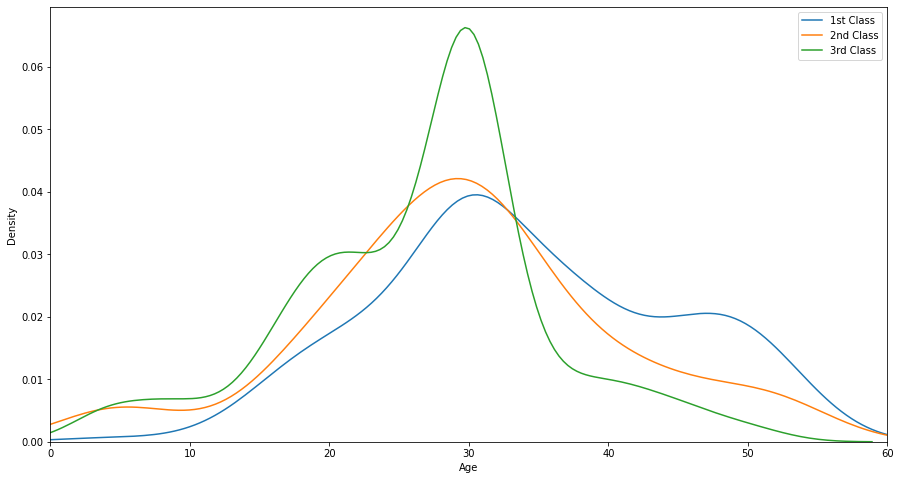

In [ ]:
#Explore the socio-economic status of the passenger, is there any relationship between socio-economic status with
# other features, such as age, gender, number of family members on board, etc. 

#The one way we can distinguish a passenger's socio-ecnomic status can be ticket class(Pclass) because they need to
#pay more to reserve good seats, which means that passengers who are in the first class are likely to have higher
#social status than others.


#1.relationship between pclass(socio-economic status) and age
#Using KDE(Kernel Density Estimator) plot,
plt.figure(figsize=(15,8))
sns.kdeplot(clean_titanic_train.Age[clean_titanic_train.Pclass == 1], shade=False)
sns.kdeplot(clean_titanic_train.Age[clean_titanic_train.Pclass == 2], shade=False)
sns.kdeplot(clean_titanic_train.Age[clean_titanic_train.Pclass == 3], shade=False)
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')
plt.xlim([0, 60])
plt.show()

The plot shows that passengers in the age group of 30's had the lowest proportion of first class seats while passengers in the age group opf 40's and 50's had the highest proportion.

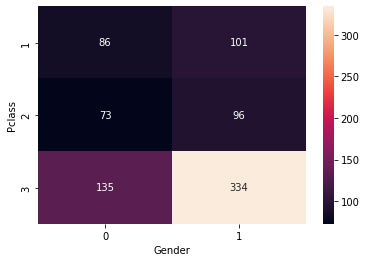

In [ ]:
#2.relationship between pclass(socio-economic status) and gender
#Using heatmap,

heatmap_df = clean_titanic_train.groupby(['Pclass', 'Gender'])
pclass_gender = heatmap_df.size().unstack()

sns.heatmap(pclass_gender, annot = True, fmt ="d")


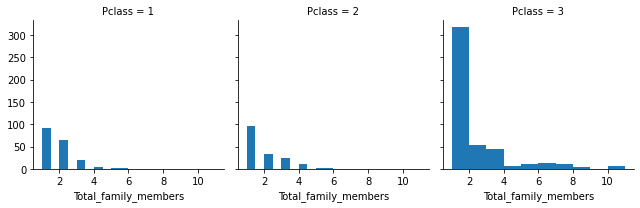

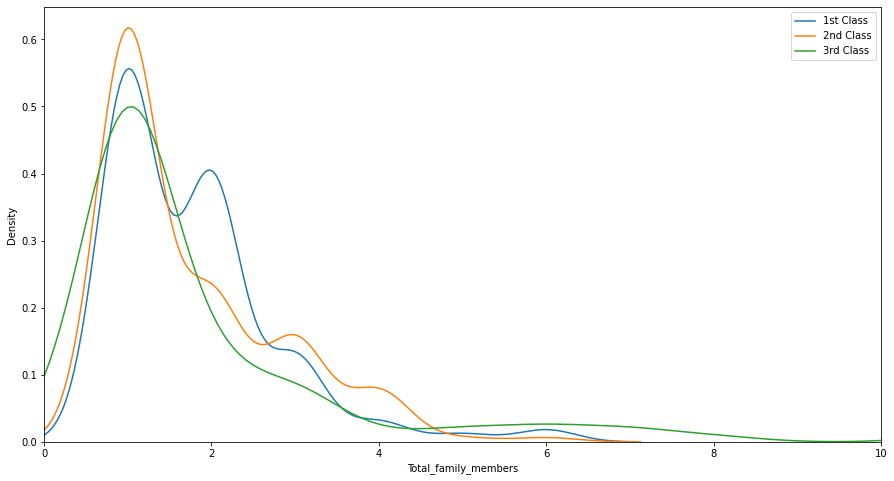

In [ ]:
#3.relationship between pclass(socio-economic status) and family member
#Add the column "Total family members"
#Total family members = Parch +SibSp + 1(including oneself)
for dt in clean_titanic_train:
    clean_titanic_train['Total_family_members'] = 1 + clean_titanic_train['Parch'] + clean_titanic_train['SibSp']

S = sns.FacetGrid(data = clean_titanic_train[clean_titanic_train['Total_family_members'].notna()], col = 'Pclass')
S.map(plt.hist, "Total_family_members")

plt.figure(figsize=(15,8))
sns.kdeplot(clean_titanic_train.Total_family_members[clean_titanic_train.Pclass == 1], shade=False)
sns.kdeplot(clean_titanic_train.Total_family_members[clean_titanic_train.Pclass == 2], shade=False)
sns.kdeplot(clean_titanic_train.Total_family_members[clean_titanic_train.Pclass == 3], shade=False)
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')
plt.xlim([0, 10])
plt.show()

According to the figure above, a passenger whoose total family member is 2 has the highest proportion in the first class seats. We guess the reason is that couples came to celebrate for their anniversary and they want better seats for that.

In [ ]:
# Now we are going to investigate how many couples are in the first class
couples = clean_titanic_train[clean_titanic_train['SibSp'] == 1]
couples = couples[couples['Parch'] == 0]
couples = couples[couples['Pclass'] == 1]
num_of_first_couples = len(couples)
num_of_first_couples

49

In [ ]:
num_of_first_passengers = clean_titanic_train[clean_titanic_train['Pclass']==1]
num_of_first_passengers = len(num_of_first_passengers)
num_of_first_passengers

187

About 30 percent of total number of passengers in the first class are couples, but it is hard to explain the relationship between socio-economic status and number of family members because the number of couples doesn't necessarily tell that they must have higher socio-economic status than others.

Below graphs represents that distribution of survival victims regard to age, gender, Pclass, SibSp, and Parch

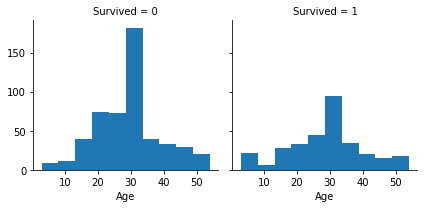

In [ ]:
# Explore the distribution of survival victims in relation to age, gender, socioeconomic
# class, etc.

# 1. relationship between Survived and Age

A = sns.FacetGrid(data = clean_titanic_train[clean_titanic_train['Age'].notna()], col = 'Survived')
A.map(plt.hist, "Age")

The number of passengers whose age group is in their 30s represents big portion of total passengers. So, there are a lot of passengers in their 30s who died or survived compared to other age groups.

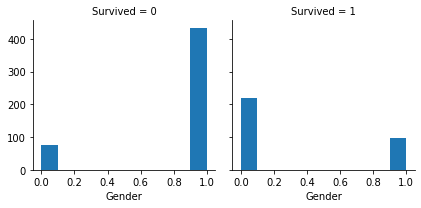

In [ ]:
# 2. relationship between Survived and Gender

G = sns.FacetGrid(data = clean_titanic_train[clean_titanic_train['Gender'].notna()], col = 'Survived')
G.map(plt.hist, "Gender")

1 represents the male, and we can see that lots of male passengers died. Otherwise, survived rate of female passengers is higher than male passengers.

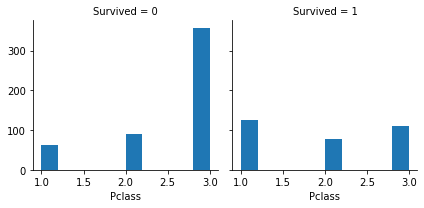

In [ ]:
# 3. relationship between Survived and Pclass

C = sns.FacetGrid(data = clean_titanic_train[clean_titanic_train['Pclass'].notna()], col = 'Survived')
C.map(plt.hist, "Pclass")

The passengers in first class died less than other classes and survived more compared to passengers in other classes.

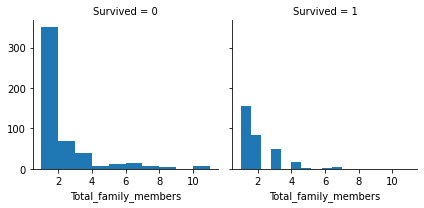

In [ ]:
# 4. relationship between Survived and Total family members

F = sns.FacetGrid(data = clean_titanic_train[clean_titanic_train['Total_family_members'].notna()], col = 'Survived')
F.map(plt.hist, "Total_family_members")

We can see that the number of passengers on board alone accounted for a large portion of total passengers. So, the passengers who boarded alone died or survived more compared to others.

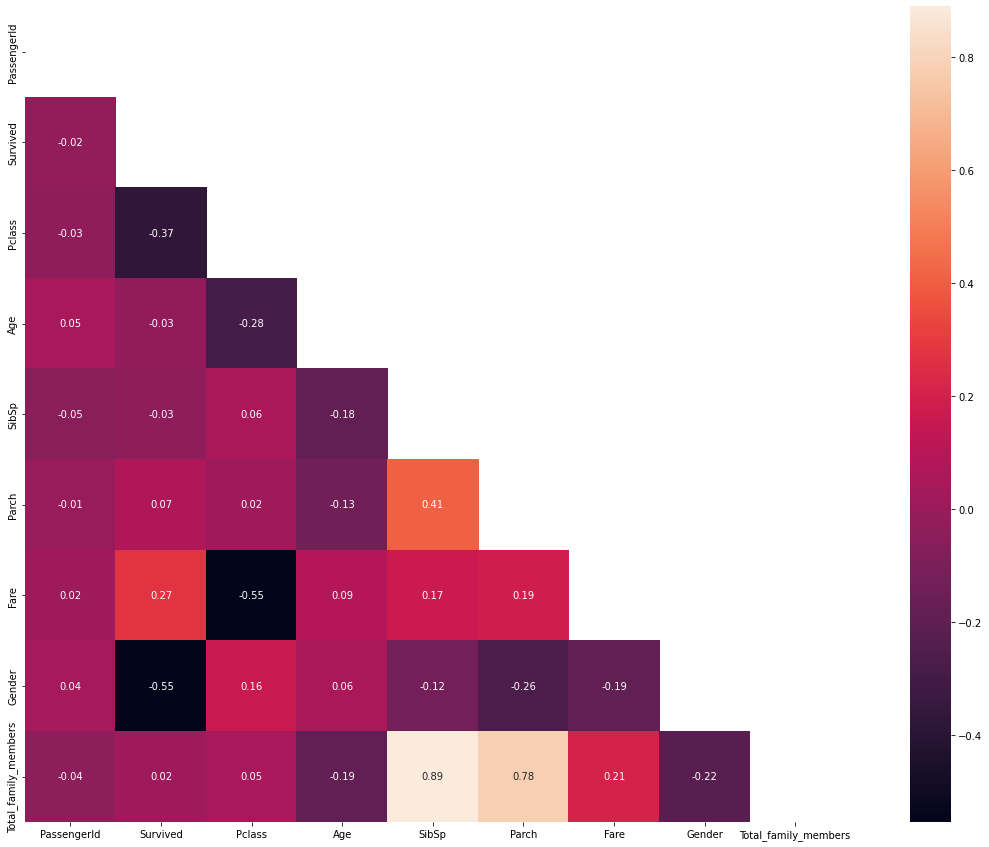

In [ ]:
# What features seem to be the most important ones? Perform a correlation analysis
# before your prediction task.

correlation = clean_titanic_train.corr(method = 'spearman')
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25,15))
sns.heatmap(correlation, annot = True, mask = mask, fmt=".2f", square = True,linecolor = "black")

The heatmap shows that "Gender", "Pclass" and "Fare" are highly correlated with survival. Specifically, "Gender" is the most related factor to survive, and the correlation -0.55 means that survival rate of female is higher than male's. So, we can use those factors as training and testing features.

In [ ]:
#Build three models, train them on the training set, and predict the outcome on the test set (after
#dropping the survival column in the test set). Explain how each model works (briefly introduce
#the machine learning algorithms behind them). 
#Evaluate the performance of each model based on the original outcome in the test set. If your predictions are 
#not so accurate, what do you think is the reason? Use other evaluation metrics to evaluate your 
#models (Precision, Recall, Fscore). Split the data further to include a cross validation set. 
#Did this improve your model’s performance on the test set?

#1. Build a logistic regression model.
logistic_train_data = clean_titanic_train[70:]
logistic_training_features = logistic_train_data[['Gender', 'Pclass', 'Fare']]
logistic_training_label = logistic_train_data[['Survived']]

#70 testing set 
logistic_test_data = clean_titanic_train[:70]
logistic_testing_features = logistic_test_data[['Gender', 'Pclass', 'Fare']]
logistic_testing_label = logistic_test_data[['Survived']]


In [ ]:
#scaling the training and testing features
scaler = StandardScaler()
logistic_training_features = scaler.fit_transform(logistic_training_features)
logistic_testing_features = scaler.transform(logistic_testing_features)

In [ ]:
#build logistic regression model
logisticReg = LogisticRegression()
logisticReg.fit(logistic_training_features, logistic_training_label.values.ravel())
logistic_predicted = logisticReg.predict(logistic_testing_features)


In [ ]:
#calculate the acurracy score of the logistic regression model
accuracy_score(logistic_testing_label, logistic_predicted)

0.7714285714285715

In [ ]:
#calculate the F1 score of the logistic regression model
f1_score(logistic_testing_label, logistic_predicted)

0.7419354838709677

In [ ]:
#calculate the recall score of the logistic regression model
recall_score(logistic_testing_label, logistic_predicted)

0.7666666666666667

In [ ]:
#calculate the precision score of the logistic regression model
precision_score(logistic_testing_label, logistic_predicted)

0.71875

In [ ]:
predicted_df = logistic_testing_label.copy()
predicted_df['Survived'] = logistic_predicted
predicted_df

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
71,1
72,0
73,0
74,0


In [ ]:
#2. Build a KNN model.
knn_train_data = clean_titanic_train[70:]
knn_training_features = knn_train_data[['Gender', 'Pclass', 'Fare']]
knn_training_label = knn_train_data[['Survived']]

#70 testing set 
knn_test_data = clean_titanic_train[:70]
knn_testing_features = knn_test_data[['Gender', 'Pclass', 'Fare']]
knn_testing_label = logistic_test_data[['Survived']]

In [ ]:
scaler = StandardScaler()
knn_training_features = scaler.fit_transform(knn_training_features)
knn_testing_features = scaler.transform(knn_testing_features)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(knn_training_features, knn_training_label)

KNeighborsClassifier()

In [ ]:
knn_predicted = KNN.predict(knn_testing_features)
knn_predicted = knn_predicted.round()

In [ ]:
#calculate the acurracy score of the Knn model
accuracy_score(knn_testing_label, knn_predicted)

0.7714285714285715

In [ ]:
#calculate the F1 score of the Knn model
f1_score(knn_testing_label, knn_predicted)

0.7037037037037038

In [ ]:
#calculate the recall score of the Knn model
recall_score(knn_testing_label, knn_predicted)

0.6333333333333333

In [ ]:
#calculate the precision score of the Knn model
precision_score(knn_testing_label, knn_predicted)

0.7916666666666666

In [ ]:
prediction_df = knn_testing_label.copy()
prediction_df['Survived'] = knn_predicted
prediction_df

,Survived
0,0
1,1
2,0
3,1
4,0
...,...
71,0
72,0
73,0
74,1


In [ ]:
#3. Build a Random Forest model.

rfc_train_data = clean_titanic_train[70:]
rfc_training_features =  rfc_train_data[['Gender', 'Pclass', 'Fare']]
rfc_training_label = rfc_train_data[['Survived']]

rfc_test_data = clean_titanic_train[:70]
rfc_testing_features = rfc_test_data[['Gender', 'Pclass', 'Fare']]
rfc_testing_label = rfc_test_data[['Survived']]

rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(rfc_training_features, rfc_training_label)
rfc_predicted = rfc.predict(rfc_testing_features)

rfc_predicted_df = rfc_testing_label.copy()
rfc_predicted_df['Survived'] = rfc_predicted
rfc_predicted_df


,Survived
0,0
1,1
2,0
3,1
4,0
...,...
71,0
72,0
73,0
74,1


In [ ]:
#calculate the acurracy score of the rfc model
accuracy_score(rfc_testing_label, rfc_predicted)

0.7428571428571429

In [ ]:
#calculate the f1 score of the rfc model
f1_score(rfc_testing_label, rfc_predicted)

0.689655172413793

In [ ]:
#calculate the recall score of the rfc model
recall_score(rfc_testing_label, rfc_predicted)

0.6666666666666666

In [ ]:
#calculate the precision score of the rfc model
precision_score(rfc_testing_label, rfc_predicted)

0.7142857142857143

In [ ]:
#cross validation (logistic regression model)
cv_scores_logistic = cross_val_score(logisticReg, logistic_training_features, logistic_training_label)
cv_scores_logistic.mean()

0.7867549668874172

In [ ]:
#cross validation (knn model)
cv_scores_knn = cross_val_score(KNN, knn_training_features, knn_training_label)
cv_scores_knn.mean()

0.8278145695364237

In [ ]:
#cross validation (rfc model)
cv_scores_rfc = cross_val_score(rfc, rfc_training_features, rfc_training_label)
cv_scores_rfc.mean()

0.8172185430463577

In [ ]:
#Compare models

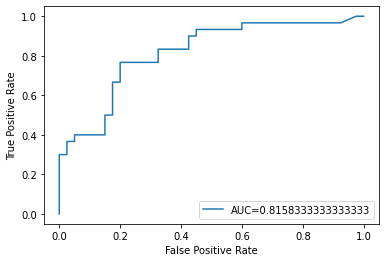

In [ ]:
# ROC curve (logstic model)
label_logistic_predicted = logisticReg.predict_proba(logistic_testing_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(logistic_testing_label, label_logistic_predicted)
auc = metrics.roc_auc_score(logistic_testing_label, label_logistic_predicted)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

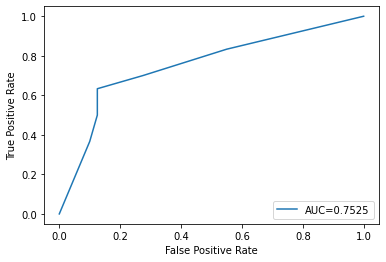

In [ ]:
# ROC curve (KNN model)
label_knn_predicted = KNN.predict_proba(knn_testing_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(knn_testing_label, label_knn_predicted)
auc = metrics.roc_auc_score(knn_testing_label, label_knn_predicted)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

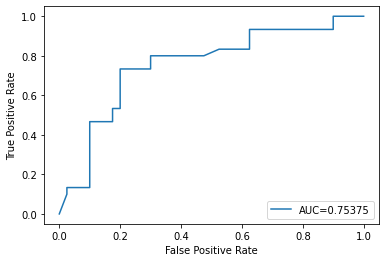

In [ ]:
# ROC curve (rfc model)
label_rfc_predicted = rfc.predict_proba(rfc_testing_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(rfc_testing_label, label_rfc_predicted)
auc = metrics.roc_auc_score(rfc_testing_label, label_rfc_predicted)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

We used ROC curve to compare performance of each model. Since logistic regression model has the biggest AUC(Area Under Curve) value, so we can say that logistic regression model is the best to use out of three models. 